In [40]:
from __future__ import division
from pylab import *
from scipy import optimize
import numpy as np
import pandas as pd

import Jesse_Funcs_New.JessePlot
import Jesse_Funcs_New.blahut as blahut
import Jesse_Funcs_New.helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data_file = np.load('C_nonequal_optimized.npz')
data_file['data'].item()['C_nonequal']

array([[ 1.03066364,  1.03456128,  0.        ,  0.        ],
       [ 1.03526249,  1.98494333,  2.00124845,  0.        ],
       [ 0.        ,  2.00228688,  2.11968304,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [3]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
np.round(data_file['data'].item()['C_nonequal'],2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.57,  1.73],
       [ 1.  ,  1.55,  1.82,  1.88],
       [ 1.  ,  1.81,  1.87,  1.89]])

In [26]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
np.round(data_file['data'].item()['C_nonequal'],2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.87,  1.89]])

In [93]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
np.round(data_file['data'].item()['C_nonequal'],2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.87,  1.91]])

In [103]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
np.round(data_file['data'].item()['C_nonequal'],2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.87,  1.92]])

In [111]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
np.round(data_file['data'].item()['C_nonequal'],2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.9 ,  1.93]])

In [116]:
data_file = np.load('C_nonequal_optimized_new_PCM.npz')
np.round(data_file['data'].item()['C_nonequal'],2)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.56,  1.7 ,  1.77],
       [ 1.  ,  1.66,  1.82,  1.88],
       [ 1.  ,  1.81,  1.9 ,  1.93]])

In [112]:
ys = np.round(data_file['data'].item()['C_nonequal'],2)

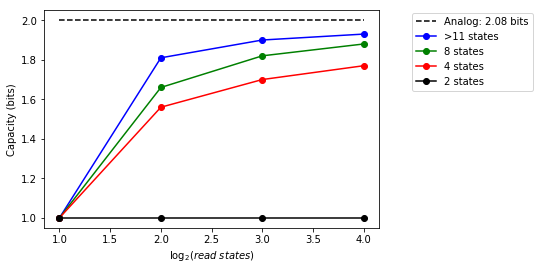

In [113]:
x_plot = np.array([4,3,2,1])
x = np.flip(x_plot, axis=0)
colors = ['black', 'red','green','blue']
plt.plot(x, 2*np.ones_like(x), c='black' ,linestyle='--')
for i in x_plot:
    plt.plot(x,ys[i-1,:], c=colors[i-1], marker='o')
plt.legend(["Analog: 2.08 bits", ">11 states", "8 states", "4 states", "2 states"], loc = (1.1,0.63))
plt.xlabel(r"${\log}_{2} \left(read \ states\right)$")
plt.ylabel("Capacity (bits)")

/home/rzarcone/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


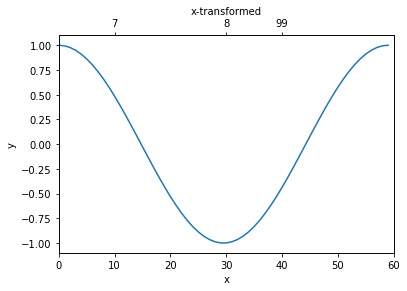

In [86]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

a = np.cos(2*np.pi*np.linspace(0, 1, 60.))
ax1.plot(range(60), a)

ax1.set_xlim(0, 60)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2 = ax1.twiny()
ax2.set_xlabel("x-transformed")
ax2.set_xlim(0, 60)
ax2.set_xticks([10, 30, 40])
ax2.set_xticklabels(['7','8','99'])

In [36]:
test_mat = np.zeros((4,4))
test_mat

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [37]:
for ix, iy in [(3,2),(3,3)]:
    test_mat[ix][iy] = 1
test_mat

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.]])